In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#To show the plots immediately after the call
%matplotlib inline
import seaborn as sns
sns.set(style='white', color_codes=True)
import datetime
import statsmodels.api as sm
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [2]:
download_df = pd.read_csv('download_info.csv')

In [3]:
ranking_df = pd.read_csv('ranking_info.csv')

## 1) Initial Observations

In [4]:
download_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3514 entries, 0 to 3513
Data columns (total 5 columns):
App ID       3514 non-null int64
Country      3514 non-null object
Date         3514 non-null object
Device       3514 non-null object
Downloads    3441 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 96.1+ KB


In [5]:
# There are a few null/Nan values in the Downloads column. Look at the data, I've determined
# that they are apps with 0 downloads on that day.
download_df.sort_values('Downloads')

,App ID,Country,Date,Device,Downloads
119,488,USA,05/16/2014,iPhone,1.0
1525,1375,South Africa,05/21/2014,iPhone,1.0
2864,2022,Great Britain,05/26/2014,iPad,1.0
916,2022,Great Britain,05/21/2014,iPhone,1.0
2691,2022,Great Britain,05/22/2014,iPad,1.0
2640,1762,Great Britain,05/21/2014,iPad,1.0
3410,1803,South Africa,05/24/2014,iPad,1.0
1570,1375,South Africa,05/22/2014,iPhone,1.0
1141,2022,Great Britain,05/26/2014,iPhone,1.0
3390,1163,South Africa,05/24/2014,iPad,1.0


In [6]:
# Remove the Nans and replace them with 0
download_df['Downloads'].fillna(0, inplace=True)
# Check to see if it worked
download_df.sort_values('Downloads')

,App ID,Country,Date,Device,Downloads
2058,1762,USA,05/20/2014,iPad,0.0
2638,1759,Great Britain,05/21/2014,iPad,0.0
2057,1759,USA,05/20/2014,iPad,0.0
2048,1331,USA,05/20/2014,iPad,0.0
2021,1817,USA,05/19/2014,iPad,0.0
2879,792,South Africa,05/13/2014,iPad,0.0
3459,1803,South Africa,05/25/2014,iPad,0.0
3460,1817,South Africa,05/25/2014,iPad,0.0
2824,451,Great Britain,05/26/2014,iPad,0.0
1006,2022,Great Britain,05/23/2014,iPhone,0.0


In [7]:
download_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3514 entries, 0 to 3513
Data columns (total 5 columns):
App ID       3514 non-null int64
Country      3514 non-null object
Date         3514 non-null object
Device       3514 non-null object
Downloads    3514 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 96.1+ KB


In [8]:
# change the date to datetime datatype
download_df['Date'] = pd.to_datetime(download_df['Date'])

In [9]:
download_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3514 entries, 0 to 3513
Data columns (total 5 columns):
App ID       3514 non-null int64
Country      3514 non-null object
Date         3514 non-null datetime64[ns]
Device       3514 non-null object
Downloads    3514 non-null float64
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 109.8+ KB


In [10]:
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682400 entries, 0 to 682399
Data columns (total 6 columns):
App ID     682400 non-null int64
Country    682400 non-null object
Date       682400 non-null object
Hour       682400 non-null object
Device     682400 non-null object
Rank       682400 non-null int64
dtypes: int64(2), object(4)
memory usage: 20.8+ MB


In [11]:
ranking_df

,App ID,Country,Date,Hour,Device,Rank
0,1549,USA,05/13/2014,00:00:00,iPhone,1
1,973,USA,05/13/2014,00:00:00,iPhone,2
2,1969,USA,05/13/2014,00:00:00,iPhone,3
3,1900,USA,05/13/2014,00:00:00,iPhone,4
4,1483,USA,05/13/2014,00:00:00,iPhone,5
5,558,USA,05/13/2014,00:00:00,iPhone,6
6,2171,USA,05/13/2014,00:00:00,iPhone,7
7,2056,USA,05/13/2014,00:00:00,iPhone,8
8,1959,USA,05/13/2014,00:00:00,iPhone,9
9,313,USA,05/13/2014,00:00:00,iPhone,10


In [12]:
# change the date to datetime datatype
ranking_df['Date'] = pd.to_datetime(ranking_df['Date'])

In [13]:
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682400 entries, 0 to 682399
Data columns (total 6 columns):
App ID     682400 non-null int64
Country    682400 non-null object
Date       682400 non-null datetime64[ns]
Hour       682400 non-null object
Device     682400 non-null object
Rank       682400 non-null int64
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 23.4+ MB


In [14]:
pd.set_option("display.max_rows", 500)

In [15]:
download_df

,App ID,Country,Date,Device,Downloads
0,39,USA,2014-05-13,iPhone,3493.0
1,51,USA,2014-05-13,iPhone,6471.0
2,132,USA,2014-05-13,iPhone,4771.0
3,136,USA,2014-05-13,iPhone,4218.0
4,148,USA,2014-05-13,iPhone,30823.0
5,151,USA,2014-05-13,iPhone,3659.0
6,157,USA,2014-05-13,iPhone,664.0
7,179,USA,2014-05-13,iPhone,11692.0
8,191,USA,2014-05-13,iPhone,2964.0
9,208,USA,2014-05-13,iPhone,1069.0


My immediate observation concerns the validation of the data. I just did a basic check to get rid of the null values. The downloads data had a few null values, which I took to mean that that app,country, and device combination had 0 downloads on that particular day.

The dates are in order as well in terms of formatting as well as the hours.

In [16]:
# Now to check to see if there are any misspellings or other wrong values in the columns
download_df.Country.unique()

array(['USA', 'Great Britain', 'South Africa'], dtype=object)

In [17]:
download_df.Device.unique()

array(['iPhone', 'iPad'], dtype=object)

In [18]:
ranking_df.Country.unique()

array(['USA', 'Great Britain', 'South Africa'], dtype=object)

In [19]:
ranking_df.Hour.unique()

array(['00:00:00', '01:00:00', '02:00:00', '20:00:00', '08:00:00',
       '09:00:00', '11:00:00', '12:00:00', '13:00:00', '14:00:00',
       '15:00:00', '16:00:00', '17:00:00', '18:00:00', '19:00:00',
       '21:00:00', '22:00:00', '23:00:00', '03:00:00', '04:00:00',
       '05:00:00', '06:00:00', '10:00:00', '07:00:00'], dtype=object)

In [20]:
ranking_df.Device.unique()

array(['iPhone', 'iPad'], dtype=object)

From an initial data validation standpoint, all of it seems to be in order for both tables, or otherwise corrected.

Other observations are just generally concerning the data itself:
- it only covers three English speaking countries
- it does not cover non-Apple products (i.e. the Play Store)

In [21]:
ranking_df['Country'].value_counts()

South Africa     244800
USA              226400
Great Britain    211200
Name: Country, dtype: int64

In [22]:
ranking_df['Device'].value_counts()

iPhone    341200
iPad      341200
Name: Device, dtype: int64

## 2) Patterns in download dataset

In [23]:
download_df.describe()

,App ID,Downloads
count,3514.000000,3514.000000
mean,1074.696642,1586.541548
std,598.926467,4395.393978
min,21.000000,0.000000
25%,617.000000,20.000000
50%,1140.000000,248.000000
75%,1543.000000,1449.500000
max,2206.000000,80080.000000


In [24]:
download_df['Country'].value_counts()

South Africa     1281
Great Britain    1176
USA              1057
Name: Country, dtype: int64

In [25]:
download_df['Device'].value_counts()

iPhone    1776
iPad      1738
Name: Device, dtype: int64

By country:

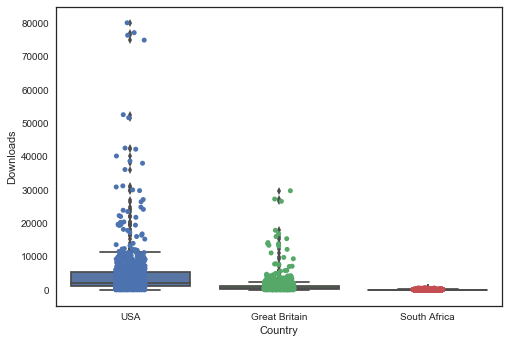

In [26]:
download_country_box = sns.boxplot(x='Country', y='Downloads', data=download_df)
download_country_box = sns.stripplot(x='Country', y='Downloads', data=download_df, jitter=True, edgecolor='gray')

Patterns:
- each country follows the same pattern of number of downloads wiht a large number of applications falling in the middle of the pack on the lower side with a few massively popular apps
- South Africa is a bit of an exception without a single large outlier outside of the blob of those in the middle of the pack

By device:

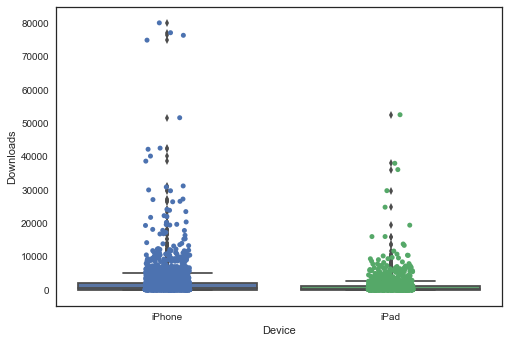

In [27]:
download_device_box = sns.boxplot(x='Device', y='Downloads', data=download_df)
download_device_box = sns.stripplot(x='Device', y='Downloads', data=download_df, jitter=True, edgecolor='gray')

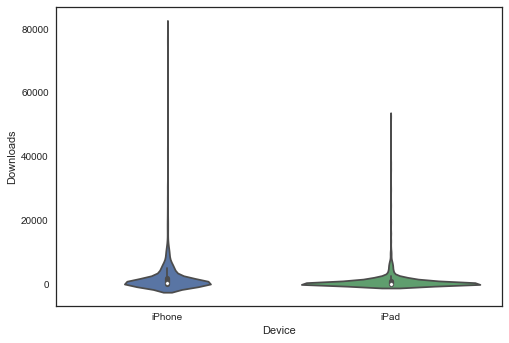

In [28]:
sns.violinplot(x='Device', y='Downloads', data=download_df, size=6)

Patterns:
- there is a larger presence of app downloads on the iPhone rather than the iPad
- this dataset has about equal number of iPhone vs iPad observations, yet the total number of downloads on the iPhone far outshadows the iPad
- I would suspect that iPhone apps are not more popular, but those using iPhones tend to download more apps, have iPads as auxillary devices simply for movie watching (it would be interested to see the app by category too), could be older users who do not need as many apps, or that there are popular apps out there not optimized or useful on an iPad over an iPhone

In [29]:
download_df.sort_values('App ID')

,App ID,Country,Date,Device,Downloads
1231,21,South Africa,2014-05-15,iPhone,9.0
1275,21,South Africa,2014-05-16,iPhone,7.0
1635,21,South Africa,2014-05-24,iPhone,13.0
1588,21,South Africa,2014-05-23,iPhone,11.0
1362,21,South Africa,2014-05-18,iPhone,11.0
1682,21,South Africa,2014-05-25,iPhone,7.0
1497,21,South Africa,2014-05-21,iPhone,9.0
1541,21,South Africa,2014-05-22,iPhone,9.0
1407,21,South Africa,2014-05-19,iPhone,8.0
1186,21,South Africa,2014-05-14,iPhone,5.0


In [30]:
# The counts of each of the apps (appearances in the data not downloads)
# I know I don't need to use a lambda function, but I just wanted to
download_df.groupby(by=['App ID']).apply(lambda x: x.count()).sort_values('Country', ascending=False)

,App ID,Country,Date,Device,Downloads
App ID,,,,,
767,84,84,84,84,84
1140,84,84,84,84,84
617,84,84,84,84,84
132,84,84,84,84,84
148,84,84,84,84,84
1067,84,84,84,84,84
1230,70,70,70,70,70
1453,70,70,70,70,70
1501,70,70,70,70,70


Patterns:
- I wonder why some apps aren't listed on certain days
- Some partial answers are that 1) the app is only made for either the iPhone or the iPad, 2) this data only contains the "top sellers", even though some of the apps only have single digit downloads for a day, 3) the app is only sold in one of the three countries
- it's curious that some apps are only listed once in the entire downloads dataset
- did that app suddenly go off the market after only being listed for one day
- I assume that it is not bc those apps have 0 downloads b/c there already are some listed with 0 downloads (initially as null values, but I fixed that earlier during data validation)

In [31]:
# The counts of each of the apps by country (appearances in the data not downloads)
download_df.groupby(by=['App ID', 'Country']).count().sort_index()

Date  Device  Downloads
App ID Country                               
21     South Africa     14      14         14
29     South Africa     14      14         14
39     South Africa     14      14         14
       USA              14      14         14
51     Great Britain    14      14         14
       South Africa     14      14         14
       USA              14      14         14
78     South Africa     14      14         14
106    Great Britain    14      14         14
119    USA              14      14         14
132    Great Britain    28      28         28
       South Africa     28      28         28
       USA              28      28         28
136    USA               9       9          9
148    Great Britain    28      28         28
       South Africa     28      28         28
       USA              28      28         28
151    Great Britain    14      14         14
       USA              14      14         14
157    USA              14      14         14
179    Great Britain    14      14         14
       South Africa     14      14         14
       USA              14      14         14
191    South Africa     28      28         28
       USA              14      14         14
200    South Africa     28      28         28
208    Great Britain    14      14         14
       South Africa     28      28         28
       USA              14      14         14
220    South Africa     14      14         14
242    USA              14      14         14
254    Great Britain    14      14         14
277    Great Britain    14      14         14
289    Great Britain    14      14         14
       South Africa     14      14         14
296    South Africa     14      14         14
303    Great Britain    14      14         14
345    Great Britain    14      14         14
450    USA              14      14         14
451    Great Britain    11      11         11
       South Africa      6       6          6
       USA              11      11         11
465    Great Britain    14      14         14
       USA              14      14         14
488    USA              14      14         14
490    South Africa     14      14         14
522    Great Britain    14      14         14
532    South Africa     14      14         14
565    USA              28      28         28
610    Great Britain    14      14         14
       South Africa      3       3          3
       USA              14      14         14
617    Great Britain    28      28         28
       South Africa     28      28         28
       USA              28      28         28
627    Great Britain    14      14         14
       USA              14      14         14
643    Great Britain    14      14         14
       South Africa     14      14         14
652    USA              28      28         28
687    Great Britain    28      28         28
       South Africa     20      20         20
690    South Africa     14      14         14
736    Great Britain    14      14         14
753    Great Britain    14      14         14
       South Africa     14      14         14
756    South Africa     14      14         14
767    Great Britain    28      28         28
       South Africa     28      28         28
       USA              28      28         28
792    South Africa      2       2          2
803    Great Britain    14      14         14
       South Africa     14      14         14
       USA              14      14         14
804    South Africa     10      10         10
806    USA              14      14         14
823    USA               4       4          4
862    South Africa     28      28         28
       USA              28      28         28
864    Great Britain    14      14         14
889    South Africa     13      13         13
913    South Africa     28      28         28
918    Great Britain    14      14         14
       USA              28      28         28
948    USA              14      14         14
949    South Africa 

In [32]:
# The sum of the number of downloads by app and country
pd.DataFrame(download_df.groupby(by=['App ID', 'Country'])
             ['Downloads'].apply(sum).reset_index().sort_values(['App ID', 'Country']))

,App ID,Country,Downloads
0,21,South Africa,118.0
1,29,South Africa,124.0
2,39,South Africa,185.0
3,39,USA,54006.0
4,51,Great Britain,27369.0
5,51,South Africa,355.0
6,51,USA,88346.0
7,78,South Africa,218.0
8,106,Great Britain,23561.0
9,119,USA,15832.0


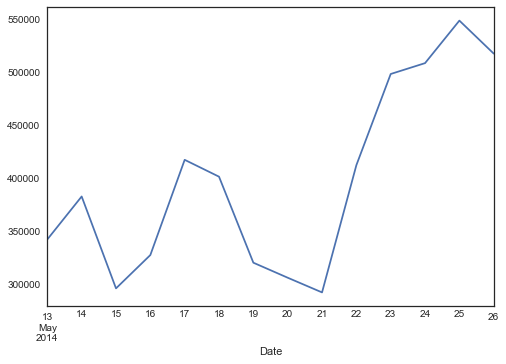

In [33]:
# See how the downloads change over time and plot it
downloads_time = pd.DataFrame(download_df.groupby(by=['Date'])['Downloads'].apply(sum).reset_index().sort_values('Date'))
downloads_time.plot.line(x='Date', y='Downloads', legend=False)

In [34]:
pd.DataFrame(download_df.groupby(by=['Date','Country'])
                                      ['Downloads'].apply(sum).reset_index().sort_values(['Date', 'Country']))

,Date,Country,Downloads
0,2014-05-13,Great Britain,56516.0
1,2014-05-13,South Africa,3262.0
2,2014-05-13,USA,282895.0
3,2014-05-14,Great Britain,54182.0
4,2014-05-14,South Africa,3055.0
5,2014-05-14,USA,325840.0
6,2014-05-15,Great Britain,52402.0
7,2014-05-15,South Africa,2845.0
8,2014-05-15,USA,241382.0
9,2014-05-16,Great Britain,101646.0


In [35]:
pd.DataFrame(download_df.groupby(by=['Date','Country'])
                                      ['Downloads'].apply(sum).sort_index())

Downloads
Date       Country                 
2014-05-13 Great Britain    56516.0
           South Africa      3262.0
           USA             282895.0
2014-05-14 Great Britain    54182.0
           South Africa      3055.0
           USA             325840.0
2014-05-15 Great Britain    52402.0
           South Africa      2845.0
           USA             241382.0
2014-05-16 Great Britain   101646.0
           South Africa      2522.0
           USA             223823.0
2014-05-17 Great Britain   116888.0
           South Africa      2568.0
           USA             298096.0
2014-05-18 Great Britain    72087.0
           South Africa      2606.0
           USA             326993.0
2014-05-19 Great Britain    52848.0
           South Africa      2500.0
           USA             265440.0
2014-05-20 Great Britain    54528.0
           South Africa      2478.0
           USA             249655.0
2014-05-21 Great Britain    58791.0
           South Africa      2395.0
           USA             231651.0
2014-05-22 Great Britain    63605.0
           South Africa      2743.0
           USA             346163.0
2014-05-23 Great Britain    95411.0
           South Africa      3468.0
           USA             399399.0
2014-05-24 Great Britain   113243.0
           South Africa      3320.0
           USA             391929.0
2014-05-25 Great Britain   138508.0
           South Africa      3924.0
           USA             406054.0
2014-05-26 Great Britain    87483.0
           South Africa      3490.0
           USA             426473.0

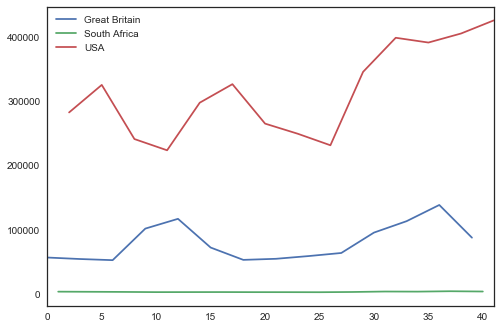

In [36]:
# Separate it out by country and plot
downloads_time_country = pd.DataFrame(download_df.groupby(by=['Date','Country'])
                                      ['Downloads'].apply(sum).reset_index().sort_values(['Date', 'Country']))

# On the same plot:
fig, ax = plt.subplots()
for label, df in downloads_time_country.groupby('Country'):
    df['Downloads'].plot(x='Date', ax=ax, label=label, legend=True)

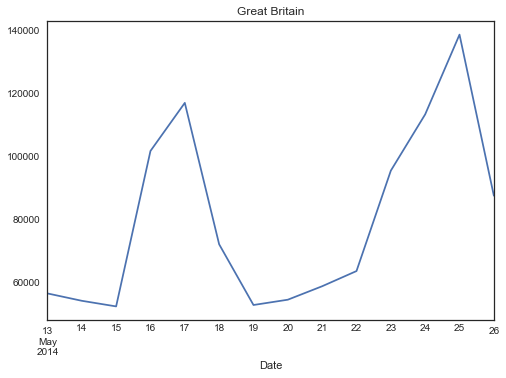

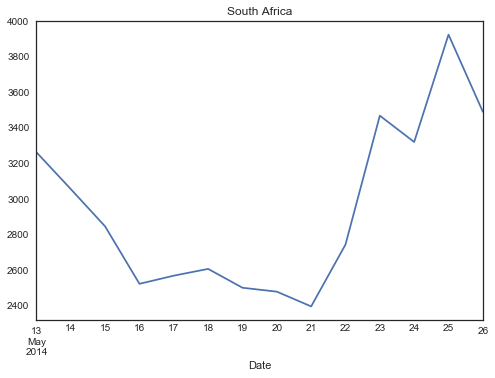

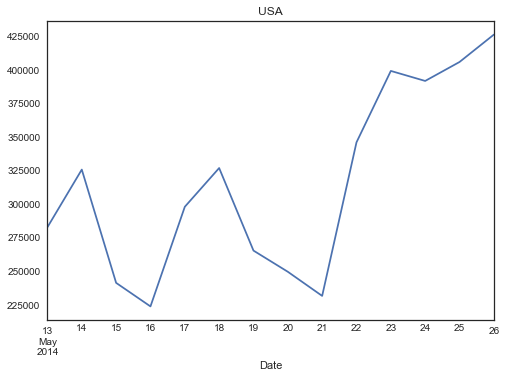

In [37]:
# For three diff plots:
for i, group in downloads_time_country.groupby('Country'):
    plt.figure()
    group.plot(x='Date', y='Downloads', title=str(i), legend=False)

Patterns:
- there are large (like massive) spikes in the the number of downloads from week to week
- these spikes do not look correlated from country to country
- obviously, the market in the US is far larger than the other two

In [38]:
pd.DataFrame(download_df.groupby(by=['Date','Country', 'Device'])
             ['Downloads'].apply(sum).sort_index())

Downloads
Date       Country       Device           
2014-05-13 Great Britain iPad      15971.0
                         iPhone    40545.0
           South Africa  iPad       1668.0
                         iPhone     1594.0
           USA           iPad      87825.0
                         iPhone   195070.0
2014-05-14 Great Britain iPad      16680.0
                         iPhone    37502.0
           South Africa  iPad       1512.0
                         iPhone     1543.0
           USA           iPad      73583.0
                         iPhone   252257.0
2014-05-15 Great Britain iPad      15130.0
                         iPhone    37272.0
           South Africa  iPad       1330.0
                         iPhone     1515.0
           USA           iPad      65879.0
                         iPhone   175503.0
2014-05-16 Great Britain iPad      32928.0
                         iPhone    68718.0
           South Africa  iPad       1212.0
                         iPhone     1310.0
           USA           iPad      69127.0
                         iPhone   154696.0
2014-05-17 Great Britain iPad      35916.0
                         iPhone    80972.0
           South Africa  iPad       1256.0
                         iPhone     1312.0
           USA           iPad      87977.0
                         iPhone   210119.0
2014-05-18 Great Britain iPad      22204.0
                         iPhone    49883.0
           South Africa  iPad       1313.0
                         iPhone     1293.0
           USA           iPad      88134.0
                         iPhone   238859.0
2014-05-19 Great Britain iPad      14671.0
                         iPhone    38177.0
           South Africa  iPad       1161.0
                         iPhone     1339.0
           USA           iPad      75311.0
                         iPhone   190129.0
2014-05-20 Great Britain iPad      14183.0
                         iPhone    40345.0
           South Africa  iPad       1148.0
                         iPhone     1330.0
           USA           iPad      70519.0
                         iPhone   179136.0
2014-05-21 Great Britain iPad      16083.0
                         iPhone    42708.0
           South Africa  iPad       1114.0
                         iPhone     1281.0
           USA           iPad      69135.0
                         iPhone   162516.0
2014-05-22 Great Britain iPad      23989.0
                         iPhone    39616.0
           South Africa  iPad       1267.0
                         iPhone     1476.0
           USA           iPad      93285.0
                         iPhone   252878.0
2014-05-23 Great Britain iPad      34509.0
                         iPhone    60902.0
           South Africa  iPad       1742.0
                         iPhone     1726.0
           USA           iPad     135888.0
                         iPhone   263511.0
2014-05-24 Great Britain iPad      37537.0
                         iPhone    75706.0
           South Africa  iPad       1679.0
                         iPhone     1641.0
           USA           iPad     121073.0
                         iPhone   270856.0
2014-05-25 Great Britain iPad      39572.0
                         iPhone    98936.0
           South Africa  iPad       1962.0
                         iPhone     1962.0
           USA           iPad     127042.0
                         iPhone   279012.0
2014-05-26 Great Britain iPad      27840.0
                         iPhone    59643.0
           South Africa  iPad       1623.0
                         iPhone     1867.0
           USA           iPad     114304.0
                         iPhone   312169.0

In [39]:
# Now to add device to each countries plot
downloads_time_country_device = pd.DataFrame(download_df.groupby(by=['Date','Country', 'Device'])
                                             ['Downloads'].apply(sum).reset_index().sort_values(['Date', 'Country']))
downloads_time_country_device

,Date,Country,Device,Downloads
0,2014-05-13,Great Britain,iPad,15971.0
1,2014-05-13,Great Britain,iPhone,40545.0
2,2014-05-13,South Africa,iPad,1668.0
3,2014-05-13,South Africa,iPhone,1594.0
4,2014-05-13,USA,iPad,87825.0
5,2014-05-13,USA,iPhone,195070.0
6,2014-05-14,Great Britain,iPad,16680.0
7,2014-05-14,Great Britain,iPhone,37502.0
8,2014-05-14,South Africa,iPad,1512.0
9,2014-05-14,South Africa,iPhone,1543.0


In [40]:
# Using a pivot_table function is exactly the same as grouping by
pivot = pd.DataFrame(downloads_time_country_device.pivot_table('Downloads', ['Date', 'Country', 'Device']))
pivot

Downloads
Date       Country       Device           
2014-05-13 Great Britain iPad      15971.0
                         iPhone    40545.0
           South Africa  iPad       1668.0
                         iPhone     1594.0
           USA           iPad      87825.0
                         iPhone   195070.0
2014-05-14 Great Britain iPad      16680.0
                         iPhone    37502.0
           South Africa  iPad       1512.0
                         iPhone     1543.0
           USA           iPad      73583.0
                         iPhone   252257.0
2014-05-15 Great Britain iPad      15130.0
                         iPhone    37272.0
           South Africa  iPad       1330.0
                         iPhone     1515.0
           USA           iPad      65879.0
                         iPhone   175503.0
2014-05-16 Great Britain iPad      32928.0
                         iPhone    68718.0
           South Africa  iPad       1212.0
                         iPhone     1310.0
           USA           iPad      69127.0
                         iPhone   154696.0
2014-05-17 Great Britain iPad      35916.0
                         iPhone    80972.0
           South Africa  iPad       1256.0
                         iPhone     1312.0
           USA           iPad      87977.0
                         iPhone   210119.0
2014-05-18 Great Britain iPad      22204.0
                         iPhone    49883.0
           South Africa  iPad       1313.0
                         iPhone     1293.0
           USA           iPad      88134.0
                         iPhone   238859.0
2014-05-19 Great Britain iPad      14671.0
                         iPhone    38177.0
           South Africa  iPad       1161.0
                         iPhone     1339.0
           USA           iPad      75311.0
                         iPhone   190129.0
2014-05-20 Great Britain iPad      14183.0
                         iPhone    40345.0
           South Africa  iPad       1148.0
                         iPhone     1330.0
           USA           iPad      70519.0
                         iPhone   179136.0
2014-05-21 Great Britain iPad      16083.0
                         iPhone    42708.0
           South Africa  iPad       1114.0
                         iPhone     1281.0
           USA           iPad      69135.0
                         iPhone   162516.0
2014-05-22 Great Britain iPad      23989.0
                         iPhone    39616.0
           South Africa  iPad       1267.0
                         iPhone     1476.0
           USA           iPad      93285.0
                         iPhone   252878.0
2014-05-23 Great Britain iPad      34509.0
                         iPhone    60902.0
           South Africa  iPad       1742.0
                         iPhone     1726.0
           USA           iPad     135888.0
                         iPhone   263511.0
2014-05-24 Great Britain iPad      37537.0
                         iPhone    75706.0
           South Africa  iPad       1679.0
                         iPhone     1641.0
           USA           iPad     121073.0
                         iPhone   270856.0
2014-05-25 Great Britain iPad      39572.0
                         iPhone    98936.0
           South Africa  iPad       1962.0
                         iPhone     1962.0
           USA           iPad     127042.0
                         iPhone   279012.0
2014-05-26 Great Britain iPad      27840.0
                         iPhone    59643.0
           South Africa  iPad       1623.0
                         iPhone     1867.0
           USA           iPad     114304.0
                         iPhone   312169.0

In [41]:
# Unstacking so that I can group by again to get the right plots
pivot.unstack(level=[2]).reset_index()

Date        Country Downloads          
Device                                iPad    iPhone
0      2014-05-13  Great Britain   15971.0   40545.0
1      2014-05-13   South Africa    1668.0    1594.0
2      2014-05-13            USA   87825.0  195070.0
3      2014-05-14  Great Britain   16680.0   37502.0
4      2014-05-14   South Africa    1512.0    1543.0
5      2014-05-14            USA   73583.0  252257.0
6      2014-05-15  Great Britain   15130.0   37272.0
7      2014-05-15   South Africa    1330.0    1515.0
8      2014-05-15            USA   65879.0  175503.0
9      2014-05-16  Great Britain   32928.0   68718.0
10     2014-05-16   South Africa    1212.0    1310.0
11     2014-05-16            USA   69127.0  154696.0
12     2014-05-17  Great Britain   35916.0   80972.0
13     2014-05-17   South Africa    1256.0    1312.0
14     2014-05-17            USA   87977.0  210119.0
15     2014-05-18  Great Britain   22204.0   49883.0
16     2014-05-18   South Africa    1313.0    1293.0
17     2014-05-18            USA   88134.0  238859.0
18     2014-05-19  Great Britain   14671.0   38177.0
19     2014-05-19   South Africa    1161.0    1339.0
20     2014-05-19            USA   75311.0  190129.0
21     2014-05-20  Great Britain   14183.0   40345.0
22     2014-05-20   South Africa    1148.0    1330.0
23     2014-05-20            USA   70519.0  179136.0
24     2014-05-21  Great Britain   16083.0   42708.0
25     2014-05-21   South Africa    1114.0    1281.0
26     2014-05-21            USA   69135.0  162516.0
27     2014-05-22  Great Britain   23989.0   39616.0
28     2014-05-22   South Africa    1267.0    1476.0
29     2014-05-22            USA   93285.0  252878.0
30     2014-05-23  Great Britain   34509.0   60902.0
31     2014-05-23   South Africa    1742.0    1726.0
32     2014-05-23            USA  135888.0  263511.0
33     2014-05-24  Great Britain   37537.0   75706.0
34     2014-05-24   South Africa    1679.0    1641.0
35     2014-05-24            USA  121073.0  270856.0
36     2014-05-25  Great Britain   39572.0   98936.0
37     2014-05-25   South Africa    1962.0    1962.0
38     2014-05-25            USA  127042.0  279012.0
39     2014-05-26  Great Britain   27840.0   59643.0
40     2014-05-26   South Africa    1623.0    1867.0
41     2014-05-26            USA  114304.0  312169.0

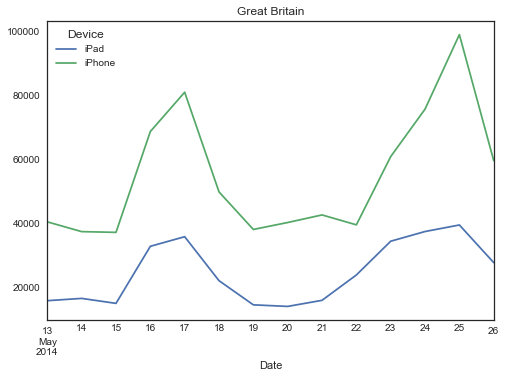

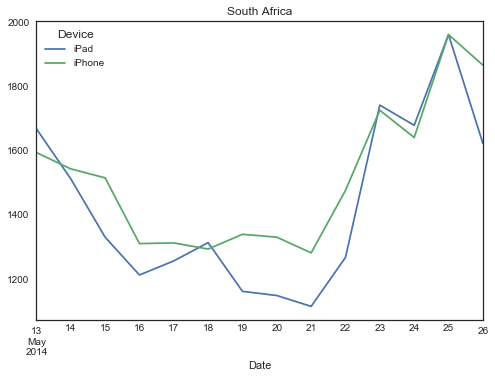

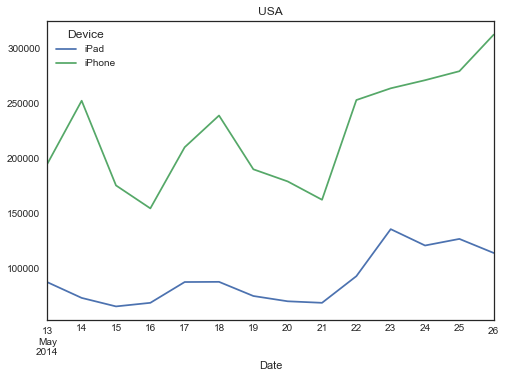

In [42]:
# Okay finally getting the right things on the right plots
for i, group in pivot.unstack(level=[2]).reset_index().groupby('Country'):
    plt.figure()
    group.plot.line(x='Date', y='Downloads', title=str(i), legend=True)

Patterns:
- the difference in iPhone v iPad usage is much, much larger in the USA, going by downloads only
- by the same logic, the iPhone v iPad usage in South Africa is about even
- again, there is a big, but not quite as large as the USA, usage disparity in GB
- I would guess that the reasons could be due to the size of the mobile app market; most likely the USA has far more apps (specifically apps only optimized for the iPhone) b/c it is the oldest mobile market
- I would hazard to guess that the South African market is the smallest and the youngest
- nevertheless, the number of downloads seems to follow the same general ebb and flow pattern regardless of the device

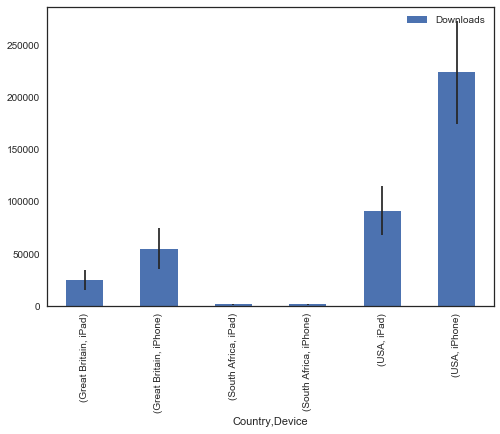

In [43]:
# Just experimenting with some different bar/error plots
# This is for TOTAL SUM by country and device
test = pd.DataFrame(download_df.groupby(by=['Date','Country', 'Device'])['Downloads'].apply(sum).sort_index())
test2 = test.groupby(level=('Country', 'Device'))
means = test2.mean()
errors = test2.std()
fig, ax = plt.subplots()
means.plot(yerr=errors, ax=ax, kind='bar')

Patterns:
- again, it is very clear to see that the mobile app market in the USA is larger than the other two combined
- even apps on the iPad have many more downloads than the iPhone app stores in GB and SA

## 3) Segments to divide data before analyzing rank and download relationship

In [44]:
download_df

,App ID,Country,Date,Device,Downloads
0,39,USA,2014-05-13,iPhone,3493.0
1,51,USA,2014-05-13,iPhone,6471.0
2,132,USA,2014-05-13,iPhone,4771.0
3,136,USA,2014-05-13,iPhone,4218.0
4,148,USA,2014-05-13,iPhone,30823.0
5,151,USA,2014-05-13,iPhone,3659.0
6,157,USA,2014-05-13,iPhone,664.0
7,179,USA,2014-05-13,iPhone,11692.0
8,191,USA,2014-05-13,iPhone,2964.0
9,208,USA,2014-05-13,iPhone,1069.0


In [45]:
ranking_df

,App ID,Country,Date,Hour,Device,Rank
0,1549,USA,2014-05-13,00:00:00,iPhone,1
1,973,USA,2014-05-13,00:00:00,iPhone,2
2,1969,USA,2014-05-13,00:00:00,iPhone,3
3,1900,USA,2014-05-13,00:00:00,iPhone,4
4,1483,USA,2014-05-13,00:00:00,iPhone,5
5,558,USA,2014-05-13,00:00:00,iPhone,6
6,2171,USA,2014-05-13,00:00:00,iPhone,7
7,2056,USA,2014-05-13,00:00:00,iPhone,8
8,1959,USA,2014-05-13,00:00:00,iPhone,9
9,313,USA,2014-05-13,00:00:00,iPhone,10


Looking at the download and ranking dataframes, it's clear to see that the ranking df only has two other data points, hour and rank. Therefore, before making any comparison, the data should be broken down by date, country, device, and app id so that there can be a more or less one to one comparison for each app in each market per device per day.

The apps can be examined combining the device types as well as looking at them separately.

Concerning the hour, I would either take the average rank across the entire day to make a day to day comparison with the download data, OR I would compare the entire day's worth of downloads for that particular app/device/country combination to perhaps get a sense of when a majority of the downloads took place. Of course, that assumes that the number of downloads within that hour has a significant effect on the app's ranking. Additionally, I could simply use one hour out of the day and compare it versus the entire day's downloads to get a more general impression of how overall daily downloads affect the rank. Again, I do think that looking at the data more longitudinally over the course of each hour throughout the day will give a more accurate read on how total number of downloads might affect rank.

## 4) Relationship between rank and downloads

In [46]:
# Select a specific segment of data meaning a specific country, device and on a specific date
# I am selecting the US market b/c it is the largest so the sample sizes will be more accurate
# If I have time, I will go through the GB and SA markets to see if it is any different there
# For now I will separate by device and look at the iPhone data b/c it, again, has a larger
# sample size than the iPad data
# 
# iPhone data on May 14
d_df = download_df.loc[(download_df['Country'] == 'USA') & (download_df['Date'] == '2014-05-14')
                       & (download_df['Device'] == 'iPhone')]
d_df.sort_values(['App ID'], inplace=True)
d_df

c:\users\spencer\programming\python27\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,App ID,Country,Date,Device,Downloads
36,39,USA,2014-05-14,iPhone,3861.0
37,51,USA,2014-05-14,iPhone,6690.0
38,132,USA,2014-05-14,iPhone,5811.0
39,136,USA,2014-05-14,iPhone,3813.0
40,148,USA,2014-05-14,iPhone,31140.0
41,151,USA,2014-05-14,iPhone,3431.0
42,157,USA,2014-05-14,iPhone,557.0
43,179,USA,2014-05-14,iPhone,10436.0
44,191,USA,2014-05-14,iPhone,4000.0
45,208,USA,2014-05-14,iPhone,988.0


In [47]:
r_df = ranking_df.loc[(ranking_df['Country'] == 'USA') & (ranking_df['Date'] == '2014-05-14')
                      & (ranking_df['Device'] == 'iPhone')]
r_df.sort_values(['App ID', 'Hour'], inplace=True)
r_df

c:\users\spencer\programming\python27\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


,App ID,Country,Date,Hour,Device,Rank
1780,2,USA,2014-05-14,00:00:00,iPhone,181
2180,2,USA,2014-05-14,01:00:00,iPhone,181
2588,2,USA,2014-05-14,08:00:00,iPhone,189
2993,2,USA,2014-05-14,09:00:00,iPhone,194
3383,2,USA,2014-05-14,11:00:00,iPhone,184
3783,2,USA,2014-05-14,12:00:00,iPhone,184
4183,2,USA,2014-05-14,13:00:00,iPhone,184
4583,2,USA,2014-05-14,14:00:00,iPhone,184
4976,2,USA,2014-05-14,15:00:00,iPhone,177
5376,2,USA,2014-05-14,16:00:00,iPhone,177


In [48]:
# Merging the two dataframes so that I can more easily compare and plot
# Using inner join b/c there are some app ids that appear in one or the other dataset that
# do not show up in the other one
df = d_df.merge(r_df, how='inner', on='App ID')
df

,App ID,Country_x,Date_x,Device_x,Downloads,Country_y,Date_y,Hour,Device_y,Rank
0,39,USA,2014-05-14,iPhone,3861.0,USA,2014-05-14,00:00:00,iPhone,302
1,39,USA,2014-05-14,iPhone,3861.0,USA,2014-05-14,01:00:00,iPhone,302
2,39,USA,2014-05-14,iPhone,3861.0,USA,2014-05-14,08:00:00,iPhone,301
3,39,USA,2014-05-14,iPhone,3861.0,USA,2014-05-14,09:00:00,iPhone,304
4,39,USA,2014-05-14,iPhone,3861.0,USA,2014-05-14,11:00:00,iPhone,331
5,39,USA,2014-05-14,iPhone,3861.0,USA,2014-05-14,12:00:00,iPhone,331
6,39,USA,2014-05-14,iPhone,3861.0,USA,2014-05-14,13:00:00,iPhone,331
7,39,USA,2014-05-14,iPhone,3861.0,USA,2014-05-14,14:00:00,iPhone,331
8,39,USA,2014-05-14,iPhone,3861.0,USA,2014-05-14,15:00:00,iPhone,346
9,39,USA,2014-05-14,iPhone,3861.0,USA,2014-05-14,16:00:00,iPhone,346


In [49]:
df.drop(['Country_y', 'Date_y', 'Device_y'], 1, inplace=True)
df.rename(columns={'Country_x':'Country', 'Date_x':'Date', 'Device_x':'Device'}, inplace=True)

In [50]:
# Check for Nan
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 412 entries, 0 to 411
Data columns (total 7 columns):
App ID       412 non-null int64
Country      412 non-null object
Date         412 non-null datetime64[ns]
Device       412 non-null object
Downloads    412 non-null float64
Hour         412 non-null object
Rank         412 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 20.9+ KB


In [51]:
# Find the mean rank so that I can just have a one to one download to mean rank
# so I can plot the relationship and see any general overarching patterns before
# running a regression
day_df = df.drop('Hour', 1)

In [52]:
# Find the mean for each app id on that day
mean_rank = day_df.groupby('App ID')['Rank'].mean().reset_index()

# Drop the duplicates from the dataframe so I can replace the rank with the mean rank
day_df.drop_duplicates(subset=['App ID'], inplace=True)
day_df.drop('Rank', 1, inplace=True)

In [53]:
# Add the mean rank to the new dataframe for plotting
day_df = day_df.merge(mean_rank, how='inner', on='App ID')

In [54]:
day_df.rename(columns={'Rank':'Avg_rank'}, inplace=True)
day_df

,App ID,Country,Date,Device,Downloads,Avg_rank
0,39,USA,2014-05-14,iPhone,3861.0,339.294118
1,51,USA,2014-05-14,iPhone,6690.0,192.294118
2,132,USA,2014-05-14,iPhone,5811.0,316.764706
3,136,USA,2014-05-14,iPhone,3813.0,328.882353
4,148,USA,2014-05-14,iPhone,31140.0,32.058824
5,151,USA,2014-05-14,iPhone,3431.0,328.705882
6,179,USA,2014-05-14,iPhone,10436.0,153.764706
7,565,USA,2014-05-14,iPhone,3775.0,350.529412
8,617,USA,2014-05-14,iPhone,4544.0,254.529412
9,627,USA,2014-05-14,iPhone,6927.0,258.705882


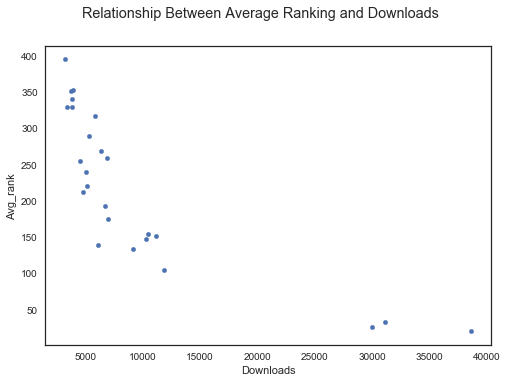

In [55]:
# Plot the relationship
day_df.plot(x='Downloads', y='Avg_rank', kind='scatter')
plt.suptitle('Relationship Between Average Ranking and Downloads')

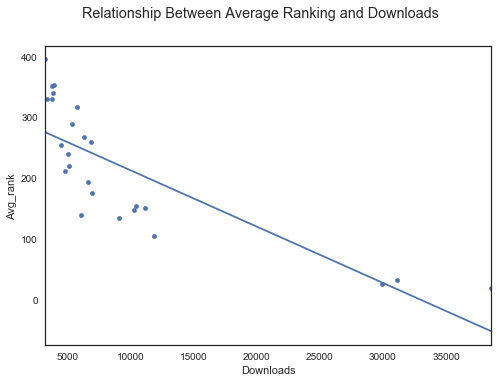

In [56]:
trend = day_df.copy()
# Calculate the trendline using first degree polynomial
z = np.polyfit(x=trend['Downloads'], y=trend['Avg_rank'], deg=1)
p = np.poly1d(z)
trend['trendline'] = p(trend['Downloads'])
# Plot the trendline
ax = trend.plot(x='Downloads', y='Avg_rank', kind='scatter')
trend.set_index('Downloads', inplace=True)
trend['trendline'].sort_index(ascending=False).plot(ax=ax)
plt.gca().invert_xaxis()
plt.suptitle('Relationship Between Average Ranking and Downloads')

There is an NEGATIVE relationship (or INVERSE POSITIVE) relationship between the average rank and the number of downloads. As the number of downloads goes up, the rank goes down (obviously, the higher the rank, the lower the number). However, it is not a completely linear relationship. At first glance it seems as though the relationshp is that of an exponential probability density function where the marginal changes get less and less as the curve reaches one end or the other. I.e. the slope reaches infinity for low download/poorly ranked apps and 0 for high download/well ranked apps.

One thing to note as well that clearly shows that the relationship is non-linear remains that there are apps with less downloads that still rank better than apps with more downloads.

Keep in mind that this is only for one app on particular device on a certain day in a certain country so there is a lot of room for error given such a small sample out of the population.

## Best way to calculate the average daily rank for an app from its hourly ranks

Harmonic Mean

In [57]:
# I am assuming that this means the average hourly rank vs the average daily rank...
# Meaning the best way to calculate an app's rank over the course of a single day
# given all the hourly ranking data
day_df_hmean = df.drop('Hour', 1)

In [58]:
# I have already looked at and used the mean
# Now to take a quick look at the harmonic mean and the median
hmean_rank = day_df_hmean.groupby('App ID')['Rank'].apply(lambda x: stats.hmean(x)).reset_index()
# Drop the duplicates from the dataframe so I can replace the rank with the mean rank
day_df_hmean.drop_duplicates(subset=['App ID'], inplace=True)
day_df_hmean.drop('Rank', 1, inplace=True)
# Add the harmonic mean rank to the new dataframe for plotting
day_df_hmean = day_df_hmean.merge(hmean_rank, how='inner', on='App ID')
# Rename the column
day_df_hmean.rename(columns={'Rank':'Avg_rank'}, inplace=True)
# Calculating the logs
day_df_hmean['log_downloads'] = np.log(day_df_hmean['Downloads'])
day_df_hmean['log_avg_rank'] = np.log(day_df_hmean['Avg_rank'])
day_df_hmean

,App ID,Country,Date,Device,Downloads,Avg_rank,log_downloads,log_avg_rank
0,39,USA,2014-05-14,iPhone,3861.0,337.474996,8.258681,5.821491
1,51,USA,2014-05-14,iPhone,6690.0,192.107707,8.808369,5.258056
2,132,USA,2014-05-14,iPhone,5811.0,316.696937,8.667508,5.757945
3,136,USA,2014-05-14,iPhone,3813.0,328.344394,8.246172,5.794063
4,148,USA,2014-05-14,iPhone,31140.0,31.957578,10.346248,3.464409
5,151,USA,2014-05-14,iPhone,3431.0,323.295101,8.140607,5.778566
6,179,USA,2014-05-14,iPhone,10436.0,153.519566,9.253017,5.033828
7,565,USA,2014-05-14,iPhone,3775.0,350.007239,8.236156,5.857954
8,617,USA,2014-05-14,iPhone,4544.0,253.460705,8.421563,5.535209
9,627,USA,2014-05-14,iPhone,6927.0,255.051961,8.843182,5.541467


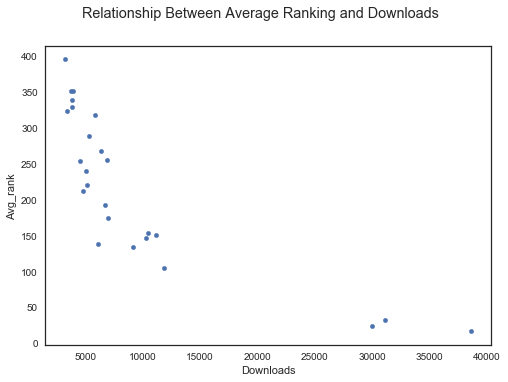

In [59]:
# Plot the relationship
day_df_hmean.plot(x='Downloads', y='Avg_rank', kind='scatter')
plt.suptitle('Relationship Between Average Ranking and Downloads')

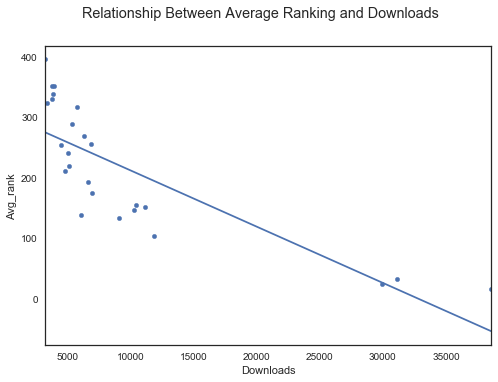

In [60]:
trend = day_df_hmean.copy()
# Calculate the trendline using first degree polynomial
z = np.polyfit(x=trend['Downloads'], y=trend['Avg_rank'], deg=1)
p = np.poly1d(z)
trend['trendline'] = p(trend['Downloads'])
# Plot the trendline
ax = trend.plot(x='Downloads', y='Avg_rank', kind='scatter')
trend.set_index('Downloads', inplace=True)
trend['trendline'].sort_index(ascending=False).plot(ax=ax)
plt.gca().invert_xaxis()
plt.suptitle('Relationship Between Average Ranking and Downloads')

Quite honestly, using the harmonic mean seems to make no difference whatsoever.

So let's look at the relationship using the log values.

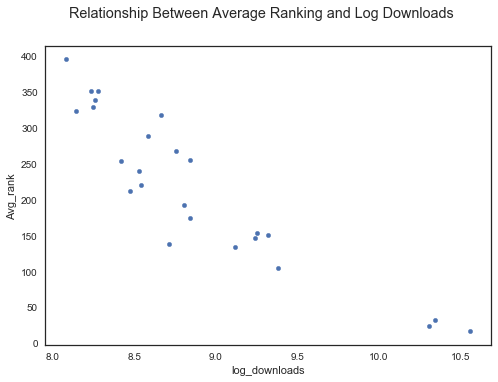

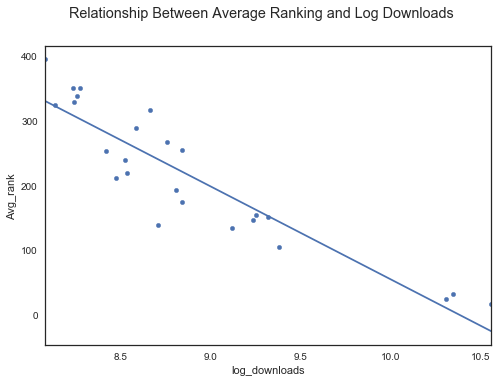

In [61]:
# Log download
# Plot the relationship
day_df_hmean.plot(x='log_downloads', y='Avg_rank', kind='scatter')
plt.suptitle('Relationship Between Average Ranking and Log Downloads')

# Plot the trend
trend = day_df_hmean.copy()
# Calculate the trendline using first degree polynomial
z = np.polyfit(x=trend['log_downloads'], y=trend['Avg_rank'], deg=1)
p = np.poly1d(z)
trend['trendline'] = p(trend['log_downloads'])
# Plot the trendline
ax = trend.plot(x='log_downloads', y='Avg_rank', kind='scatter')
trend.set_index('log_downloads', inplace=True)
trend['trendline'].sort_index(ascending=False).plot(ax=ax)
plt.gca().invert_xaxis()
plt.suptitle('Relationship Between Average Ranking and Log Downloads')

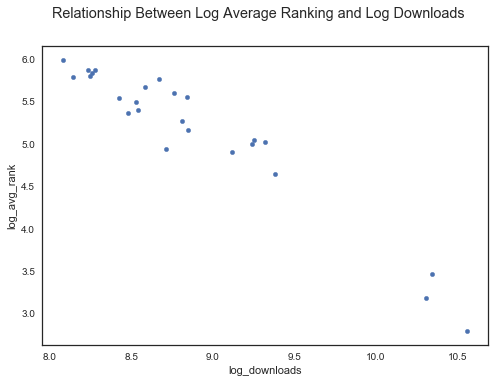

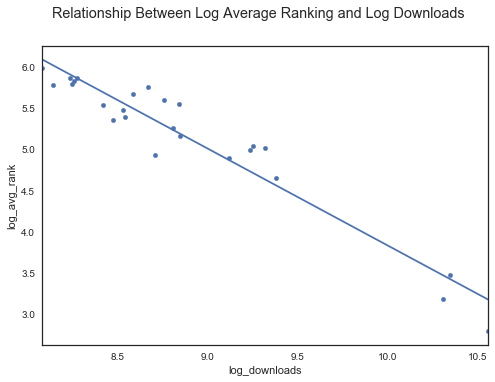

In [62]:
# Log download and log harmonic average mean
# Plot the relationship
day_df_hmean.plot(x='log_downloads', y='log_avg_rank', kind='scatter')
plt.suptitle('Relationship Between Log Average Ranking and Log Downloads')

# Plot the trend
trend = day_df_hmean.copy()
# Calculate the trendline using first degree polynomial
z = np.polyfit(x=trend['log_downloads'], y=trend['log_avg_rank'], deg=1)
p = np.poly1d(z)
trend['trendline'] = p(trend['log_downloads'])
# Plot the trendline
ax = trend.plot(x='log_downloads', y='log_avg_rank', kind='scatter')
trend.set_index('log_downloads', inplace=True)
trend['trendline'].sort_index(ascending=False).plot(ax=ax)
plt.gca().invert_xaxis()
plt.suptitle('Relationship Between Log Average Ranking and Log Downloads')

Median

In [64]:
# Now using the median:
day_df_median = df.drop('Hour', 1)
median_rank = day_df_median.groupby('App ID')['Rank'].median().reset_index()
# Drop the duplicates from the dataframe so I can replace the rank with the mean rank
day_df_median.drop_duplicates(subset=['App ID'], inplace=True)
day_df_median.drop('Rank', 1, inplace=True)
# Add the harmonic mean rank to the new dataframe for plotting
day_df_median = day_df_median.merge(median_rank, how='inner', on='App ID')
# Rename the column
day_df_median.rename(columns={'Rank':'Median_rank'}, inplace=True)
# Calculating the logs
day_df_median['log_downloads'] = np.log(day_df_median['Downloads'])
day_df_median['log_median_rank'] = np.log(day_df_median['Median_rank'])
day_df_median

,App ID,Country,Date,Device,Downloads,Median_rank,log_downloads,log_median_rank
0,39,USA,2014-05-14,iPhone,3861.0,346.0,8.258681,5.846439
1,51,USA,2014-05-14,iPhone,6690.0,193.0,8.808369,5.262690
2,132,USA,2014-05-14,iPhone,5811.0,317.0,8.667508,5.758902
3,136,USA,2014-05-14,iPhone,3813.0,320.0,8.246172,5.768321
4,148,USA,2014-05-14,iPhone,31140.0,31.0,10.346248,3.433987
5,151,USA,2014-05-14,iPhone,3431.0,340.0,8.140607,5.828946
6,179,USA,2014-05-14,iPhone,10436.0,155.0,9.253017,5.043425
7,565,USA,2014-05-14,iPhone,3775.0,343.0,8.236156,5.837730
8,617,USA,2014-05-14,iPhone,4544.0,253.0,8.421563,5.533389
9,627,USA,2014-05-14,iPhone,6927.0,270.0,8.843182,5.598422


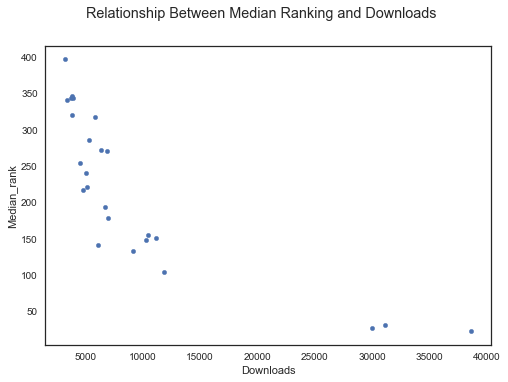

In [65]:
# Plot the relationship
day_df_median.plot(x='Downloads', y='Median_rank', kind='scatter')
plt.suptitle('Relationship Between Median Ranking and Downloads')

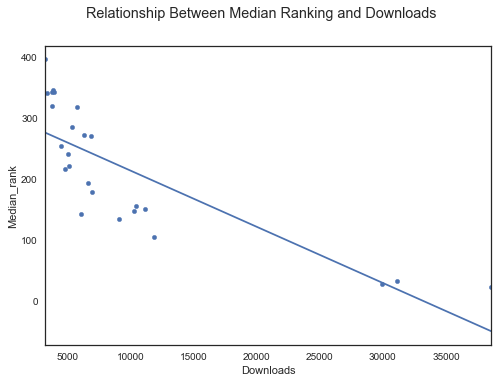

In [66]:
trend = day_df_median.copy()
# Calculate the trendline using first degree polynomial
z = np.polyfit(x=trend['Downloads'], y=trend['Median_rank'], deg=1)
p = np.poly1d(z)
trend['trendline'] = p(trend['Downloads'])
# Plot the trendline
ax = trend.plot(x='Downloads', y='Median_rank', kind='scatter')
trend.set_index('Downloads', inplace=True)
trend['trendline'].sort_index(ascending=False).plot(ax=ax)
plt.gca().invert_xaxis()
plt.suptitle('Relationship Between Median Ranking and Downloads')

Using the median does not make much of a noticeable difference either.

So let's look at the relationship using the log values.

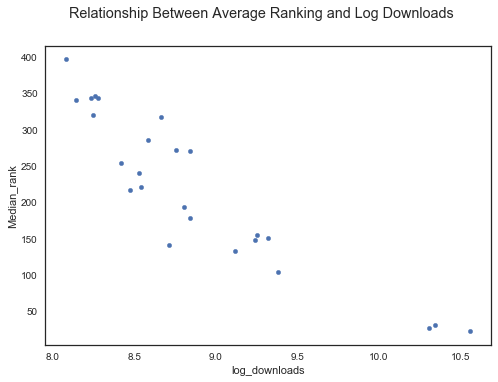

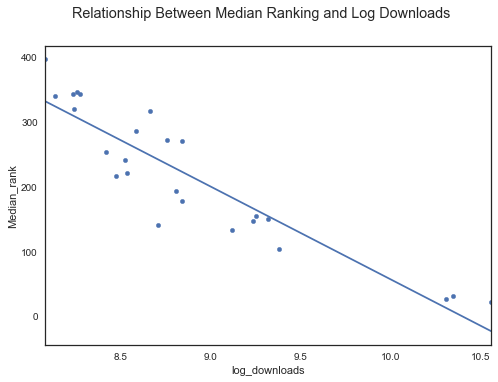

In [69]:
# Log download
# Plot the relationship
day_df_median.plot(x='log_downloads', y='Median_rank', kind='scatter')
plt.suptitle('Relationship Between Average Ranking and Log Downloads')

# Plot the trend
trend = day_df_median.copy()
# Calculate the trendline using first degree polynomial
z = np.polyfit(x=trend['log_downloads'], y=trend['Median_rank'], deg=1)
p = np.poly1d(z)
trend['trendline'] = p(trend['log_downloads'])
# Plot the trendline
ax = trend.plot(x='log_downloads', y='Median_rank', kind='scatter')
trend.set_index('log_downloads', inplace=True)
trend['trendline'].sort_index(ascending=False).plot(ax=ax)
plt.gca().invert_xaxis()
plt.suptitle('Relationship Between Median Ranking and Log Downloads')

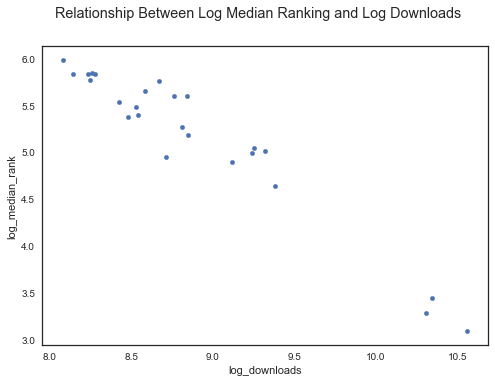

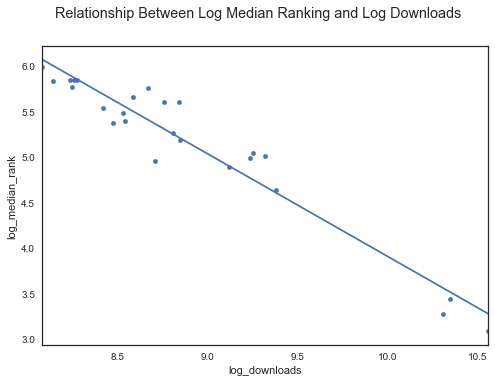

In [71]:
# Log download and log median rank
# Plot the relationship
day_df_median.plot(x='log_downloads', y='log_median_rank', kind='scatter')
plt.suptitle('Relationship Between Log Median Ranking and Log Downloads')

# Plot the trend
trend = day_df_median.copy()
# Calculate the trendline using first degree polynomial
z = np.polyfit(x=trend['log_downloads'], y=trend['log_median_rank'], deg=1)
p = np.poly1d(z)
trend['trendline'] = p(trend['log_downloads'])
# Plot the trendline
ax = trend.plot(x='log_downloads', y='log_median_rank', kind='scatter')
trend.set_index('log_downloads', inplace=True)
trend['trendline'].sort_index(ascending=False).plot(ax=ax)
plt.gca().invert_xaxis()
plt.suptitle('Relationship Between Log Median Ranking and Log Downloads')

So what is the best to use?

I would say that the mean is the best to use b/c you want to get a generalized rank for the entire day. The harmonic mean is generally used for ratings/ratios like exchange rates. The median will give you the exact middle value, but this tends to disregard the outliers completely. For example, if for one hour early in the morning, the rank for a certain app is bad (a large number), but for all other times in the day, the ranking is very good (a very low number), the median will completely disregard that one hour. However, that bad ranking number will be reflected (even if not very much) in the mean.

That said, using the mean does have its drawbacks. 1) The app or the servers could be down for maintanence, 2) Apple's app store or Google's play store could be down, 3) most users are not up and downloading applications at all hours of the night/day, especially when only looking at one country. All these situations may serve to lower the rank of an app (a higher number). Nevertheless, these situations may affect all apps equally unless its target demographics tend to be up at weird hours.

All in all, I think that mean rank gives a better reflection throughout the day.

## 6) Create a model: downloads from average rank

As noted in section 5), the relationship between downloads and average rank is not quite linear. Much of this can be attributed to the extremely high numbers of downloads, which skews the relationship up exponentially b/c of the top-ranked outliers. Just as in econometrics and wage analysis, taking the log (or natural log) of the downloads will allow the relationship to fit an OLS linear model better.

In [74]:
# For a comparison, I am going to run an OLS regression on the non-logged values so that
# I can show the difference in the R^2 value, which is a measure of fit based on
# the error in the model
# Note that the plot of that relationship is in section 5)
model = sm.formula.ols(formula='Downloads ~ Avg_rank', data=day_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              Downloads   R-squared:                       0.644
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     41.60
Date:                Tue, 20 Jun 2017   Prob (F-statistic):           1.40e-06
Time:                        10:55:24   Log-Likelihood:                -250.67
No. Observations:                  25   AIC:                             505.3
Df Residuals:                      23   BIC:                             507.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    2.46e+04   2600.495      9.460      0.0

As you can see, the R^2 value is 0.644. Note that the closer to 1, the better the regression fit the data (i.e. the less error). From an econometrics standpoint, R^2 is the explained_variation/total_variation or how much of the actual data (or measure) explains the total distance from the trendline (error)

This is probably going too deep into stats, but it should be noted that an R^2 value close to 1 does not necessarily mean that the model is good. It simply means that the regression fits the data well. It does not necessarily mean that the model does not have systematic bias. In other words, the residuals (the amount unexplained by the regression for each data point) should be random (i.e. there should not be a pattern to the residuals if plotted against the fitted value. Additionally, a low R^2 value does not necessarily mean a bad model. Depending on the field, a good R^2 could be smaller.

However, given that this regression model is quite simple with only one independent/RHS variable, I don't need to dig too deeply into the value of R^2. I would say that the much more important aspect is that there is certain some omitted variable bias, which I explain in section 7).

In [82]:
day_df['log_downloads'] = np.log(day_df['Downloads'])
day_df['log_avg_rank'] = np.log(day_df['Avg_rank'])
day_df

,App ID,Country,Date,Device,Downloads,Avg_rank,log_downloads,log_avg_rank
0,39,USA,2014-05-14,iPhone,3861.0,339.294118,8.258681,5.826867
1,51,USA,2014-05-14,iPhone,6690.0,192.294118,8.808369,5.259026
2,132,USA,2014-05-14,iPhone,5811.0,316.764706,8.667508,5.758159
3,136,USA,2014-05-14,iPhone,3813.0,328.882353,8.246172,5.795700
4,148,USA,2014-05-14,iPhone,31140.0,32.058824,10.346248,3.467572
5,151,USA,2014-05-14,iPhone,3431.0,328.705882,8.140607,5.795163
6,179,USA,2014-05-14,iPhone,10436.0,153.764706,9.253017,5.035424
7,565,USA,2014-05-14,iPhone,3775.0,350.529412,8.236156,5.859445
8,617,USA,2014-05-14,iPhone,4544.0,254.529412,8.421563,5.539416
9,627,USA,2014-05-14,iPhone,6927.0,258.705882,8.843182,5.555692


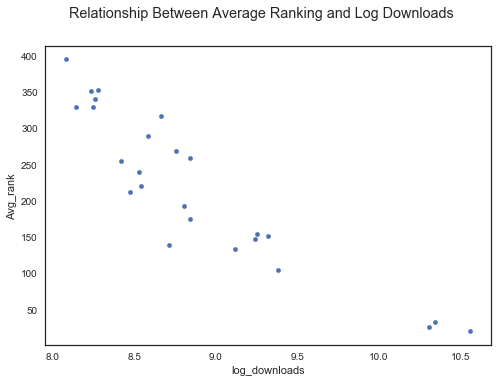

In [83]:
# Before modeling, let's take a look at the relationship of the avg rank against the log of downloads
# on a plot
day_df.plot(x='log_downloads', y='Avg_rank', kind='scatter')
plt.suptitle('Relationship Between Average Ranking and Log Downloads')
# Even just eyeballing the scatter plot, it is much better fitting to a linear model

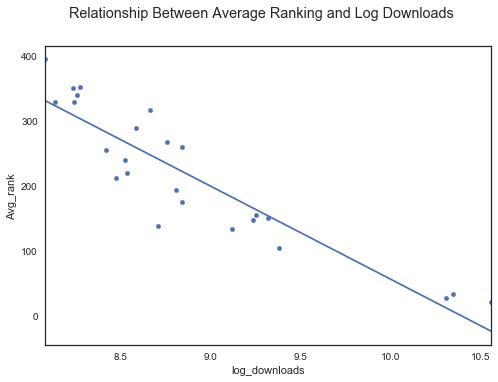

In [84]:
# Adding the trend line
trend = day_df.copy()
# Calculate the trendline using first degree polynomial
z = np.polyfit(x=trend['log_downloads'], y=trend['Avg_rank'], deg=1)
p = np.poly1d(z)
trend['trendline'] = p(trend['log_downloads'])
# Plot the trendline
ax = trend.plot(x='log_downloads', y='Avg_rank', kind='scatter')
trend.set_index('log_downloads', inplace=True)
trend['trendline'].sort_index(ascending=False).plot(ax=ax)
plt.gca().invert_xaxis()
plt.suptitle('Relationship Between Average Ranking and Log Downloads')

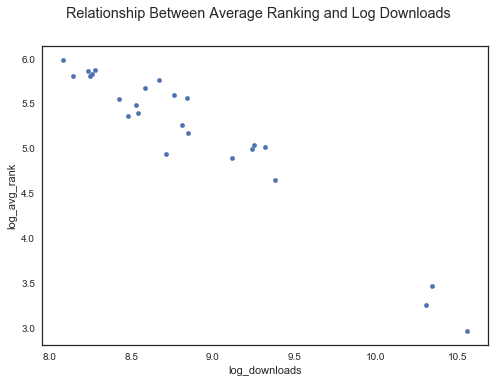

In [85]:
# Looking at the relationship as well if both are logged
day_df.plot(x='log_downloads', y='log_avg_rank', kind='scatter')
plt.suptitle('Relationship Between Average Ranking and Log Downloads')
# The plot looks even better and more linear, and I can check by running an OLS regression

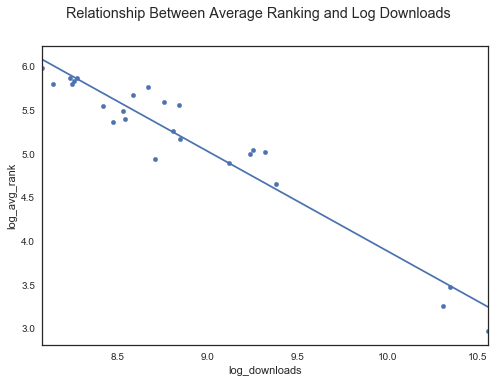

In [86]:
# Adding the trend line
trend = day_df.copy()
# Calculate the trendline using first degree polynomial
z = np.polyfit(x=trend['log_downloads'], y=trend['log_avg_rank'], deg=1)
p = np.poly1d(z)
trend['trendline'] = p(trend['log_downloads'])
# Plot the trendline
ax = trend.plot(x='log_downloads', y='log_avg_rank', kind='scatter')
trend.set_index('log_downloads', inplace=True)
trend['trendline'].sort_index(ascending=False).plot(ax=ax)
plt.gca().invert_xaxis()
plt.suptitle('Relationship Between Average Ranking and Log Downloads')

Rank and log downloads

In [87]:
# Using the mean values for rank and the log of downloads
model_logd = sm.formula.ols(formula='log_downloads ~ Avg_rank', data=day_df)
results_logd = model_logd.fit()
print(results_logd.summary())

                            OLS Regression Results                            
Dep. Variable:          log_downloads   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     114.7
Date:                Tue, 20 Jun 2017   Prob (F-statistic):           2.07e-10
Time:                        11:56:55   Log-Likelihood:                -3.2043
No. Observations:                  25   AIC:                             10.41
Df Residuals:                      23   BIC:                             12.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.1351      0.131     77.579      0.0

In [88]:
# In sample prediction of log_downloads
ypredict_logd = results_logd.predict(day_df['Avg_rank'])
print(ypredict_logd)

0      8.168035
1      9.020267
2      8.298649
3      8.228397
4      9.949230
5      8.229420
6      9.243641
7      8.102898
8      8.659458
9      8.635245
10     9.533175
11     9.263421
12     9.124281
13     8.094714
14     9.286952
15     8.910114
16     9.362319
17     8.745397
18     9.334014
19     8.863052
20     9.986013
21    10.022263
22     8.583749
23     8.463707
24     7.847715
dtype: float64


In [89]:
# Predict using out of sample data, USA iPhone from May 15
# Need new x-values, which would be ranking
r_df2 = ranking_df.loc[(ranking_df['Country'] == 'USA') & (ranking_df['Date'] == '2014-05-15')
                      & (ranking_df['Device'] == 'iPhone')]
r_df2.sort_values(['App ID', 'Hour'], inplace=True)
r_df2 = r_df2.drop('Hour', 1)
# Download data for comparing my predictions
d_df2 = download_df.loc[(download_df['Country'] == 'USA') & (download_df['Date'] == '2014-05-15')
                       & (download_df['Device'] == 'iPhone')]
d_df2.sort_values(['App ID'], inplace=True)
d_df2
# Merge
df2 = d_df2.merge(r_df2, how='inner', on='App ID')
# Find the mean rank
mean_rank2 = df2.groupby('App ID')['Rank'].mean().reset_index()
# Drop the duplicates from the dataframe so I can replace the rank with the mean rank
df2.drop_duplicates(subset=['App ID'], inplace=True)
df2.drop('Rank', 1, inplace=True)
# Add the mean rank to the new dataframe for plotting
df2 = df2.merge(mean_rank2, how='inner', on='App ID')
df2.rename(columns={'Rank':'Avg_rank'}, inplace=True)
# Drop duplicate columns
df2.drop(['Country_y', 'Date_y', 'Device_y'], 1, inplace=True)
df2.rename(columns={'Country_x':'Country', 'Date_x':'Date', 'Device_x':'Device'}, inplace=True)
df2['log_downloads'] = np.log(df2['Downloads'])
df2['log_avg_rank'] = np.log(df2['Avg_rank'])
df2

c:\users\spencer\programming\python27\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
c:\users\spencer\programming\python27\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,App ID,Country,Date,Device,Downloads,Avg_rank,log_downloads,log_avg_rank
0,39,USA,2014-05-15,iPhone,2721.0,367.000000,7.908755,5.905362
1,51,USA,2014-05-15,iPhone,4796.0,209.352941,8.475538,5.344022
2,132,USA,2014-05-15,iPhone,4621.0,311.411765,8.438366,5.741116
3,136,USA,2014-05-15,iPhone,2743.0,372.636364,7.916807,5.920603
4,148,USA,2014-05-15,iPhone,23441.0,30.294118,10.062242,3.410954
5,151,USA,2014-05-15,iPhone,3445.0,344.000000,8.144679,5.840642
6,179,USA,2014-05-15,iPhone,7226.0,159.235294,8.885441,5.070383
7,191,USA,2014-05-15,iPhone,4428.0,383.833333,8.395703,5.950208
8,565,USA,2014-05-15,iPhone,5019.0,329.000000,8.520986,5.796058
9,617,USA,2014-05-15,iPhone,4349.0,274.235294,8.377701,5.613986


Obviously running this model on completely new data will be inaccurate. I just wanted to see what it predicted after using such a small training/fitting set. As the challenge states, I should only be predicting for one particular segment on one specfic date.

In [90]:
# Run the prediction
x_new_logd = df2['Avg_rank']
y_predict_new_logd = results_logd.predict(x_new_logd)
print(y_predict_new_logd)

0     8.007410
1     8.921368
2     8.329683
3     7.974733
4     9.959461
5     8.140752
6     9.211925
7     7.909819
8     8.227715
9     8.545213
10    8.695607
11    9.422681
12    9.463264
13    9.139627
14    8.059247
15    9.315939
16    8.897155
17    9.396081
18    8.818036
19    9.277403
20    8.097271
21    8.931258
22    9.468906
23    9.712599
24    8.656048
25    8.497469
26    7.868684
dtype: float64


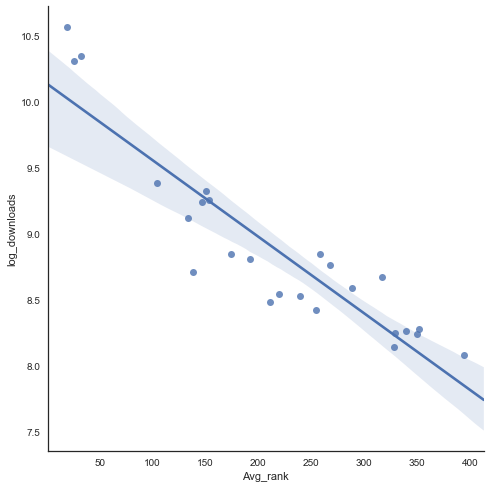

In [91]:
# Plotting he OLS for the fitted model on May 14
sns.pairplot(day_df, x_vars='Avg_rank', y_vars='log_downloads', size=7, kind='reg')

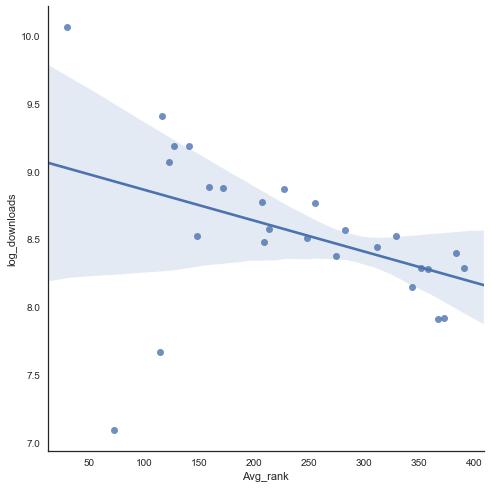

In [92]:
# Plotting he OLS for the prediction on May 15
sns.pairplot(df2, x_vars='Avg_rank', y_vars='log_downloads', size=7, kind='reg')

Log rank and log downloads

In [93]:
# Using the mean values for log rank and log downloads
model_logdr = sm.formula.ols(formula='log_downloads ~ log_avg_rank', data=day_df)
results_logdr = model_logdr.fit()
print(results_logdr.summary())

                            OLS Regression Results                            
Dep. Variable:          log_downloads   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.924
Method:                 Least Squares   F-statistic:                     293.3
Date:                Tue, 20 Jun 2017   Prob (F-statistic):           1.38e-14
Time:                        11:57:04   Log-Likelihood:                 7.1940
No. Observations:                  25   AIC:                            -10.39
Df Residuals:                      23   BIC:                            -7.950
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       13.0605      0.247     52.849   

In [94]:
# In sample prediction of log_downloads
ypredict_logdr = results_logdr.predict(day_df['log_avg_rank'])
print(ypredict_logdr)

0      8.339562
1      8.799624
2      8.395229
3      8.364813
4     10.251052
5      8.365248
6      8.980786
7      8.313168
8      8.572453
9      8.559267
10     9.298975
11     8.998965
12     8.878978
13     8.309911
14     9.021137
15     8.723283
16     9.096535
17     8.621068
18     9.067389
19     8.692740
20    10.429721
21    10.655446
22     8.531917
23     8.471531
24     8.217330
dtype: float64


In [95]:
# Predict using out of sample data, USA iPhone from May 15
# Run the prediction
x_new_logdr = df2['log_avg_rank']
y_predict_new_logdr = results_logdr.predict(x_new_logdr)
print(y_predict_new_logdr)

0      8.275966
1      8.730761
2      8.409037
3      8.263617
4     10.296924
5      8.328402
6      8.952462
7      8.239631
8      8.364523
9      8.512037
10     8.592548
11     9.162428
12     9.209948
13     8.891373
14     8.295949
15     9.049312
16     8.714757
17     9.132728
18     8.664564
19     9.012066
20     8.310927
21     8.737390
22     9.216781
23     9.585741
24     8.570583
25     8.488065
26     8.224791
dtype: float64


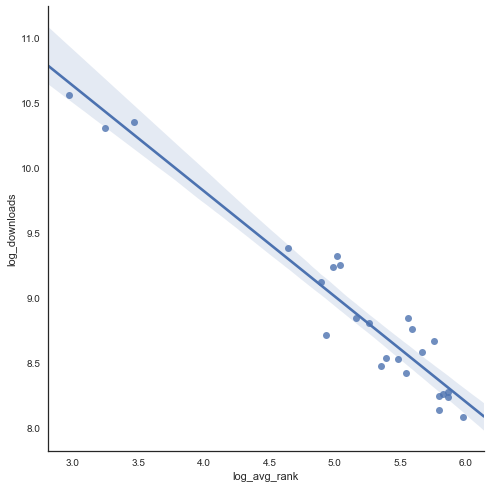

In [96]:
# Plotting he OLS for the fitted model on May 14
sns.pairplot(day_df, x_vars='log_avg_rank', y_vars='log_downloads', size=7, kind='reg')

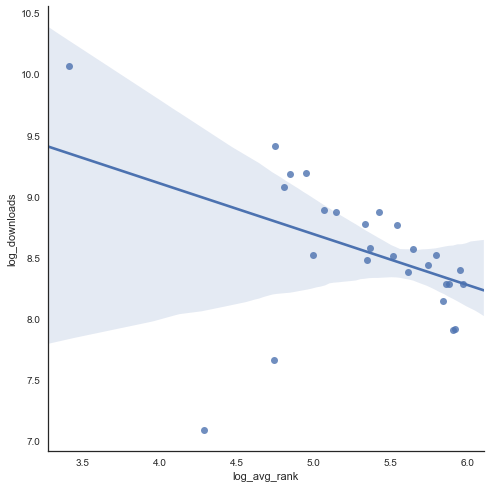

In [97]:
# Plotting he OLS for the prediction on May 15
sns.pairplot(df2, x_vars='log_avg_rank', y_vars='log_downloads', size=7, kind='reg')

Residual plots for log average rank and log downloads

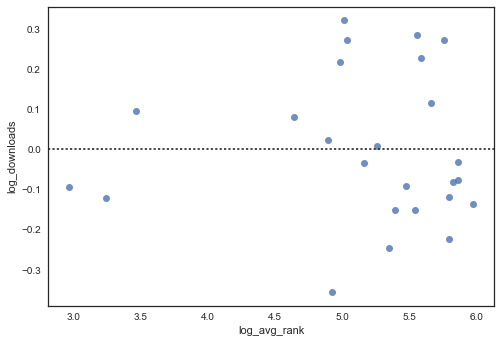

In [108]:
# The residuals seem to be sufficiently random without any discernible pattern, which means
# that the R^2 value can be trusted
sns.residplot(x='log_avg_rank', y='log_downloads', data=day_df)

Just inspecting what the OLS regression model would look like using harmonic and median

In [98]:
# Harmonic Mean
model_hmean = sm.formula.ols(formula='log_downloads ~ log_avg_rank', data=day_df_hmean)
results_hmean = model_hmean.fit()
print(results_hmean.summary())

                            OLS Regression Results                            
Dep. Variable:          log_downloads   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     274.8
Date:                Tue, 20 Jun 2017   Prob (F-statistic):           2.76e-14
Time:                        11:57:08   Log-Likelihood:                 6.4431
No. Observations:                  25   AIC:                            -8.886
Df Residuals:                      23   BIC:                            -6.448
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       12.9118      0.246     52.399   

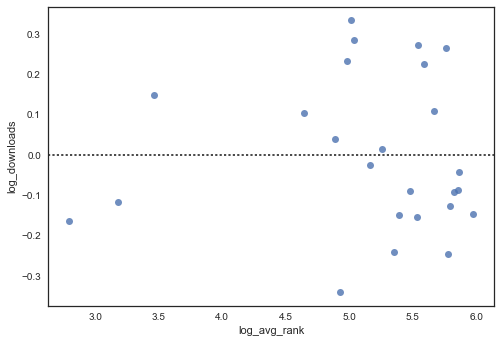

In [109]:
# Residual plots for log harmonic mean rank and log downloads
# The residuals seem to be sufficiently random without any discernible pattern, which means
# that the R^2 value can be trusted
sns.residplot(x='log_avg_rank', y='log_downloads', data=day_df_hmean)

In [99]:
# Median
model_median = sm.formula.ols(formula='log_downloads ~ log_median_rank', data=day_df_median)
results_median = model_median.fit()
print(results_median.summary())

                            OLS Regression Results                            
Dep. Variable:          log_downloads   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.926
Method:                 Least Squares   F-statistic:                     301.2
Date:                Tue, 20 Jun 2017   Prob (F-statistic):           1.04e-14
Time:                        11:57:09   Log-Likelihood:                 7.5040
No. Observations:                  25   AIC:                            -11.01
Df Residuals:                      23   BIC:                            -8.570
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          13.1393      0.248     

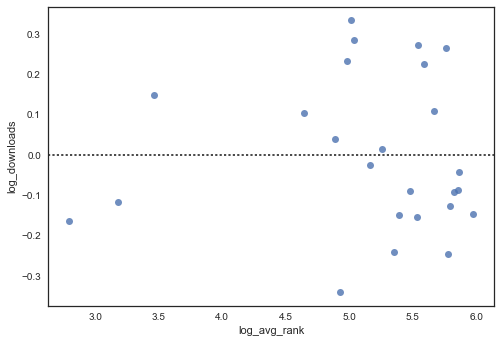

In [110]:
# Residual plots for log median rank and log downloads
# The residuals seem to be sufficiently random without any discernible pattern, which means
# that the R^2 value can be trusted
sns.residplot(x='log_avg_rank', y='log_downloads', data=day_df_hmean)

Even though the OLS regression model using the median rank has a slightly higher R^2 value, 0.929 > 0.927, I still think that using mean is the way to go based on as discussed as the end of section 5).

As far as interpretting the log models:
- log downloads against log mean: if the average rank (mean) goes down by 1% (better rank), then we expect the number of downloads to go up by 0.81%, significant at the 1% level
- log downloads against log hmean: if the harmonic mean rank goes down by 1% (better rank), then we expect the number of downloads to go up by 0.78%, significant at the 1% level
- log downloads against log median: if the median rank goes down by 1% (better rank), then we expect the number of downloads to go up by 0.82%, significant at the 1% level

## 7) Evaluate the model

In [101]:
# Now to evaluate the model using train/test split
x = day_df[['log_avg_rank']]
y = day_df[['log_downloads']]

# Split the data; training at 80% of dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

# Create the model
model2 = LinearRegression()

# Fit the model
model2.fit(x_train, y_train)

# Predict from the model
y_predict2 = model2.predict(x_test)

# R Square
print(metrics.r2_score(y_test, y_predict2))

# Root Mean Square Deviation (RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, y_predict2)))

0.978387832849
0.128142665854


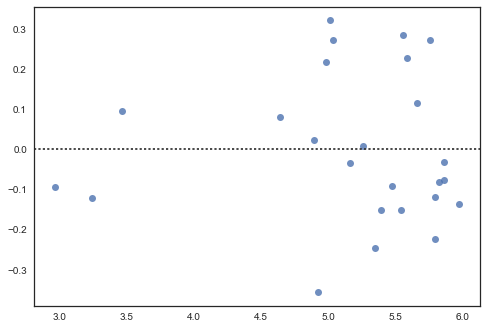

In [106]:
# Looking at the sklearn residual plott
sns.residplot(x=x, y=y)

Based on the R^2 number, the model fits about at a rate of 0.978, which is extremely high. As stated earlier, this number so close to 1 does not necessarily mean that the model is good. It simply tells me that the OLS regression for the two logs has very low residual error. The RMSE tells me that my model, on average, has a sample standard deviation of about 0.128 log(downloads).

Looking at the plot of the residual values of the log mean rank and log download OLS model, there does not seem to be any discernible pattern to the residual errors (i.e. no visible bias). Thus, the R^2 values can be trusted and the model seems to be good as well as fitting the data well.

To improve the model, I would need to include more data (i.e. have a larger sample to get a more accurate regression). Also, it should be noted that OLS regression models almost never have just one independent variable. There are certainly omitted variables here that are biasing the model and the predictions b/c, obviously, the average rank throughout the day is not the only thing that correlates (or causes) downloads.

In an ideal world, I would want data on things such as:
- number of times app users share things to social media (or to specific people)
- how much money the app company spends on marketing on that day (and through what channels)
- number of days since the last major update
- average time a user spends on the app that day
- category of app
- prior days' or weeks' rank (since I'm certain that users go to the top charts page to look for new apps and probably find apps that were already on there; think of it in terms of "momentum")
- dummy variable for whether the app is on sale
- dummy variable for whether the app is free
- etc

These RHS variables can be examined and removed later if they are irrelevant.